In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os, shutil

In [0]:
df = pd.read_csv('gdrive/My Drive/bigdata/df_final4.csv')

In [0]:
df.head(5)

,Unnamed: 0,Unnamed: 0.1,person_id,year_of_birth,gender_concept_id,ethnicity_concept_id,race_concept_id,death_type_concept_id,death,basic_metabolic_panel,compreh_metabolic_panel,lipid_panel,hepatic_func_panel,Urinalysis_with_microscopy,Urinalysis_without_microscopy,"Creatine kinase (CK), (CPK); total",Creatinine; blood,Hemoglobin; glycosylated (A1C),Iron,Prostate specific antigen (PSA); total,Thyroid stimulating hormone (TSH),"Blood count; complete (CBC), automated (Hgb, Hct, RBC, WBC and platelet count) and automated differential WBC count","Blood count; complete (CBC), automated (Hgb, Hct, RBC, WBC and platelet count)",Prothrombin time,"Culture, bacterial; quantitative colony count, urine","Electrocardiogram, routine ECG with at least 12 leads; with interpretation and report","Electrocardiogram, routine ECG with at least 12 leads; tracing only, without interpretation and report","Electrocardiogram, routine ECG with at least 12 leads; interpretation and report only",Type II diabetes mellitus uncontrolled,drug_num,0.0,Walking disability,Diabetic on insulin,High risk drug monitoring status,"Ground mileage, per statute mile","Ambulance service, advanced life support, emergency transport, level 1 (als 1 - emergency)","Ambulance service, basic life support, non-emergency transport, (bls)","Ambulance service, basic life support, emergency transport (bls-emergency)","Low osmolar contrast material, 300-399 mg/ml iodine concentration, per ml",Vaccine required,Postoperative care,H/O: artificial joint,History of renal transplant,H/O: artificial eye lens,H/O: artificial heart valve,Dialysis finding,Family history of clinical finding,Aftercare,History of clinical finding in subject,Cardiac pacemaker in situ,condition_num,condition_type_concept_id,procedure_num
0,0,0,0,1923,male,Not Hispanic or latino,Unknown,Unknown,0,none,none,none,none,none,none,none,none,none,none,none,none,none,none,220.0,none,none,none,none,none,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1,Outpatient header - 1st position,1.0
1,1,1,10,1936,female,Not Hispanic or latino,Unknown,Unknown,0,266.0,206.0,266.0,83.0,none,none,12.0,none,10000000.0,223.0,3.0,272.0,155.0,134.0,26.0,44.0,237.0,none,173.0,20.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,Outpatient header - 1st position,3.0
2,2,2,100,1943,female,Not Hispanic or latino,Unknown,Unknown,0,301.0,none,210.0,none,148.0,none,none,none,none,none,none,none,none,none,none,none,none,none,21.0,none,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,Outpatient header - 1st position,150.0
3,3,3,100001,1947,male,Not Hispanic or latino,American Indian or Alaska Native,Unknown,0,none,171.0,244.0,none,none,none,none,none,none,none,none,244.0,299.0,none,290.0,none,9.0,135.0,134.0,none,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,75,Outpatient header - 1st position,150.0
4,4,4,100003,1936,female,Not Hispanic or latino,White,Unknown,0,none,none,196.0,none,none,none,none,none,none,none,none,none,none,none,none,none,none,none,none,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55,Outpatient header - 1st position,1.0


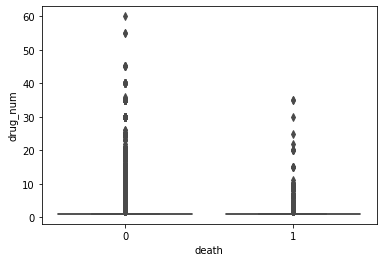

In [0]:
# Usual boxplot
#fact 1 -- whether there is diff between num of conditions and death
#df1 = df[df['drug_num']< 100]
sns.boxplot( x=df["death"], y=df["drug_num"], palette="Blues")


In [0]:
numeric = ['year_of_birth', 'basic_metabolic_panel', 'compreh_metabolic_panel', 'lipid_panel','Hemoglobin; glycosylated (A1C)','Thyroid stimulating hormone (TSH)','Blood count; complete (CBC), automated (Hgb, Hct, RBC, WBC and platelet count) and automated differential WBC count','Prothrombin time', 'Electrocardiogram, routine ECG with at least 12 leads; interpretation and report only','Type II diabetes mellitus uncontrolled','drug_num','condition_num', 'procedure_num']
df = df.replace(to_replace = 'none', value = np.nan) 
df[numeric] = df[numeric].apply(pd.to_numeric)

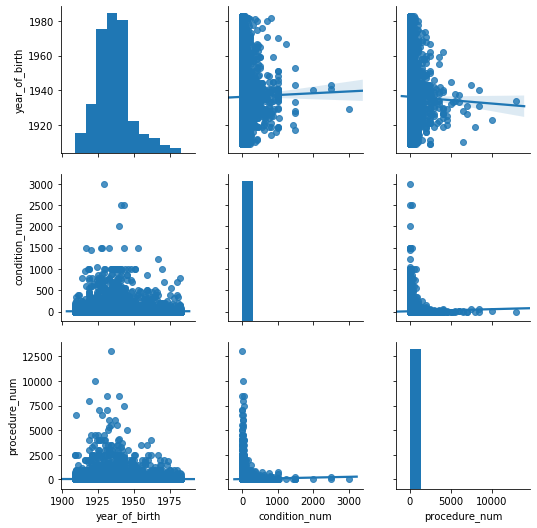

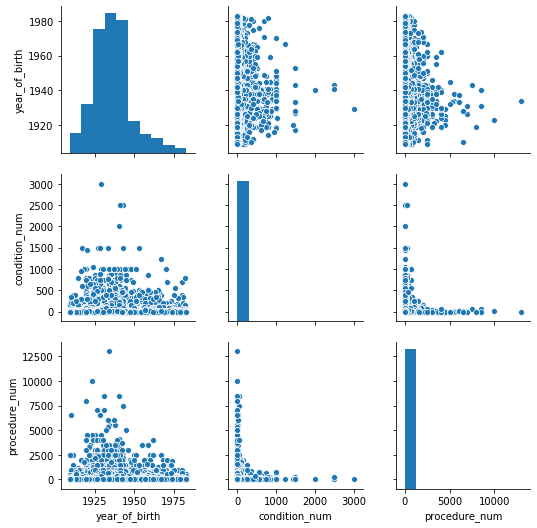

In [0]:
# with regression
sns.pairplot(df[['year_of_birth', 'condition_num', 'procedure_num']], kind="reg")
plt.show()
 
# without regression
sns.pairplot(df[['year_of_birth', 'condition_num', 'procedure_num']], kind="scatter")
plt.show()


In [0]:
## fact2 -- death rate between genders
# Age information into a separate dataframe
gender_data = df[['death', 'gender_concept_id']]

# Bin the age data
gender_groups  = gender_data.groupby('gender_concept_id').mean()
gender_groups

,death
gender_concept_id,
female,0.011751
male,0.010908


In [0]:
##fact3 -- does death happen related to race?
#df2 = df[df['race_concept_id']!='Unknown']
df2 = df
#pd.DataFrame({'Percentage': df.groupby(('race_concept_id', 'death')).size() / len(df)})
df2 = df.groupby('race_concept_id')['death'].sum()
df3 = df.groupby('race_concept_id')['death'].size()


In [0]:
pd.DataFrame({'death_rate': df2/df3})

,death_rate
race_concept_id,
American Indian or Alaska Native,0.011587
Asian,0.010758
Black or African American,0.010169
Native Hawaiian or Other Pacific Islander,0.011105
Unknown,0.011250
White,0.012653


In [0]:
df2.index

Index(['American Indian or Alaska Native', 'Asian',
       'Black or African American',
       'Native Hawaiian or Other Pacific Islander', 'Unknown', 'White'],
      dtype='object', name='race_concept_id')

In [0]:
df.groupby('death')[['condition_num', 'procedure_num','drug_num', 'year_of_birth']].agg('mean')

,condition_num,procedure_num,drug_num,year_of_birth
death,,,,
0,8.512005,30.943399,2.033410,1936.220995
1,6.704918,26.422951,2.081967,1935.096175


In [0]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df